## DAY3課題

DAY3で学んだことの取り組み<br>
 ・DAY3で学んだアルゴリズムを利用してモデルをつくり、DAY1宿題提出時の精度と比較する<br>
 ・クロスバリデーションによるパラメータチューニングを行う<br>
 ・CV済のモデルによって、精度および結果の評価を行う<br>
 ・その他、精度の向上ができるような処理に取り組み、精度を上げる<br>

### DAY2の結果
| 　          | Accuracy | precision | recall | f1-score |
| ----------- | -------- | --------- | ------ | -------- | 
|ロジスティック回帰|0.9846|0.99|0.98|0.98|
|決定木|0.9932|0.99|0.99|0.99|
|ランダムフォレスト|0.9427|0.94|0.94|0.94|
|アダブースト|0.9932|0.99|0.99|0.99|


In [2]:
#使用するライブラリのインポート
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import seaborn as sns
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
#データセットの読み込み
df_data = pd.read_csv("mushrooms.csv")

#パラメータの選定も省略
#異常値、欠測値の確認は省略
#？の置換
df_data = df_data.replace('?', 'n')
#データの削除
df_data = df_data.drop(['veil-type'], axis = 1)

#使用しないデータ項目を削除
df_tree = df_data.drop(['cap-shape', 'cap-surface', 'cap-color', 'bruises','gill-attachment', 'gill-spacing', 
                       'gill-size', 'gill-color','stalk-shape', 'stalk-root', 'stalk-surface-above-ring','stalk-surface-below-ring', 
                       'stalk-color-above-ring','stalk-color-below-ring', 'veil-color', 'ring-number','ring-type', 'population', 
                       'habitat'], axis=1)

#ダミー変数の作成
df_dummy = pd.get_dummies(df_tree[df_tree.columns]) 

#毒キノコであることを目的変数
y = df_dummy.class_p
#それ以外を説明変数
X = df_dummy.drop(['class_p','class_e'], axis=1)

print(X.columns)
#学習データとテストデータを分割する
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)


Index(['odor_a', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p',
       'odor_s', 'odor_y', 'spore-print-color_b', 'spore-print-color_h',
       'spore-print-color_k', 'spore-print-color_n', 'spore-print-color_o',
       'spore-print-color_r', 'spore-print-color_u', 'spore-print-color_w',
       'spore-print-color_y'],
      dtype='object')


### SVM
説明変数 : odor、spore-print-color<br>
目的変数 : class

In [3]:
from sklearn.svm import SVC

parameters = {'kernel':['linear','rbf'], 'C':[1,5]}
mdl_svm = SVC()
clf_svm = GridSearchCV(mdl_svm, parameters, cv=3)
clf_svm.fit(X_train, y_train)

print(clf_svm.best_params_)

{'C': 1, 'kernel': 'linear'}


In [4]:
#学習データによる評価
print(clf_svm.best_estimator_)
print()
print("score=", clf_svm.best_estimator_.score(X_train, y_train))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

score= 0.9943068164332974


In [5]:
#テストデータで評価
y_pred_svm = clf_svm.best_estimator_.predict(X_test)

#評価結果の表示
print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy : 0.9932307692307693
             precision    recall  f1-score   support

          0       0.99      1.00      0.99       843
          1       1.00      0.99      0.99       782

avg / total       0.99      0.99      0.99      1625



### ニューラルネットワーク
説明変数 : odor、spore-print-color<br>
目的変数 : class

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam

#目的変数
y = df_dummy[['class_p','class_e']]
#それ以外を説明変数
X = df_dummy.drop(['class_p','class_e'], axis=1)

#学習データとテストデータを分割する
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

mdl_nn = Sequential()
mdl_nn.add(Dense(9, activation='relu', input_dim=18))
mdl_nn.add(Dense(6, activation='relu', input_dim=9))
mdl_nn.add(Dense(2, activation='softmax'))
adam = Adam(lr=0.01)
#sgd = SGD(lr=0.01, momentum=0.9, nesterov=False)
mdl_nn.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train on 6499 samples, validate on 1625 samples
Epoch 1/20
6499/6499 [==============================] - 1s 188us/step - loss: 0.0900 - acc: 0.9731 - val_loss: 0.0246 - val_acc: 0.9932
Epoch 2/20
6499/6499 [==============================] - 0s 40us/step - loss: 0.0235 - acc: 0.9943 - val_loss: 0.0278 - val_acc: 0.9932
Epoch 3/20
6499/6499 [==============================] - 0s 45us/step - loss: 0.0217 - acc: 0.9943 - val_loss: 0.0249 - val_acc: 0.9932
Epoch 4/20
6499/6499 [==============================] - 0s 39us/step - loss: 0.0217 - acc: 0.9943 - val_loss: 0.0230 - val_acc: 0.9932
Epoch 5/20
6499/6499 [==============================] - 0s 40us/step - loss: 0.0219 - acc: 0.9943 - val_loss: 0.0229 - val_acc: 0.9932
Epoch 6/20
6499/6499 [==============================] - 0s 40us/step - loss: 0.0210 - acc: 0.9943 - val_loss: 0.0240 - val_acc: 0.9932
Epoch 7/20
6499/6499 [==============================] - 0s 45us/step - loss: 0.0216 - acc: 0.9943 - val_loss: 0.0226 - val_acc: 0.9932
Epoch 

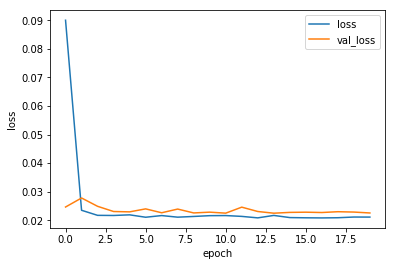

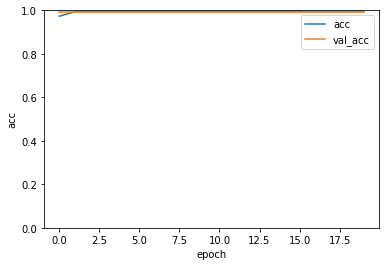

In [7]:
#学習データによる評価
fit = mdl_nn.fit(X_train, y_train, epochs=20, batch_size=20, validation_data=(X_test, y_test))

# 各epochにおける損失と精度をdfに入れる
df = pd.DataFrame(fit.history)

# グラフ化
df[["loss", "val_loss"]].plot()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

df[["acc", "val_acc"]].plot()
plt.ylabel("acc")
plt.xlabel("epoch")
plt.ylim([0,1.0])
plt.show()


In [8]:
weights = mdl_nn.get_weights()
for i in range(len(weights)):
    print("weights[%s]="%i)
    print(weights[i])
    print("num:", weights[i].flatten().shape[0])
    print()

weights[0]=
[[ 8.25826287e-01 -2.94577122e-01  5.56066704e+00 -5.70650578e-01
   8.73996317e-02  7.72921026e-01  6.27998114e-01  1.03361249e+00
   3.55418742e-01]
 [-5.50579965e-01  7.60235369e-01 -4.05739963e-01  5.84047616e-01
   4.67766702e-01 -3.12700033e-01 -3.89880776e-01 -2.41323113e-01
  -4.29801762e-01]
 [-3.01277757e-01  1.90880746e-01 -7.44398296e-01  5.94110727e-01
  -2.02299833e-01  4.23671424e-01 -1.09835118e-01 -6.98656023e-01
  -1.97777435e-01]
 [ 9.80913699e-01 -3.26411963e-01  5.12981772e-01 -4.32256013e-01
   6.80191666e-02  7.47829914e-01  8.93627644e-01  1.15850616e+00
  -1.71316624e-01]
 [-1.77869588e-01 -1.17798090e-01 -2.20607385e-01  2.55881131e-01
   1.11379719e+00  3.76600504e-01 -1.47350449e-02  7.91195333e-02
   4.59357023e-01]
 [ 4.77861077e-01  1.74851883e-02  3.19888949e-01 -4.59024459e-01
   2.19613925e-01  4.23547566e-01  1.06458652e+00  1.53437212e-01
   5.36862493e-01]
 [-2.06473157e-01 -2.06109881e-01 -4.73185092e-01  5.34349918e-01
   1.04576247e-0

### DAY3までの結果
| 　          | Accuracy | precision | recall | f1-score |
| ----------- | -------- | --------- | ------ | -------- | 
|ロジスティック回帰|0.9846|0.99|0.98|0.98|
|決定木|0.9932|0.99|0.99|0.99|
|ランダムフォレスト|0.9427|0.94|0.94|0.94|
|アダブースト|0.9932|0.99|0.99|0.99|
|SVM|0.9932|0.99|0.99|0.99|
|ニューラルネット|0.9943|-|-|-|

### 特徴量エンジニアリング
| No. | 項目 | 説明 | 値  |
| --: | :--: | :--: | :-- |
|0|class|キノコの種類|e：食用, p：毒|
|1|cap-shape|傘の形|b：ベル,c：円錐,x：凸,<br>f：扁平, k：こぶ,sunken=s：凹|
|2|cap-surface|傘の表面|f：繊維,g：溝,y：鱗,smooth=s：滑らか|
|3|cap-color|傘の色|n：茶,b：淡黄,c：シナモン,g：灰,<br>r：緑,p：桃,u：紫,e：赤,w：白,y：黄|
|4|bruises|傷|t：有,f：無|
|5|odor|臭い|a：アーモンド,l：アニス,c：クレオソート,y：魚臭い,<br>f：腐臭,m：カビ臭い,n：無し,p：刺激臭,s：スパイシー|
|6|gill-attachment|ひだの付き方|: a：付着,d：下向き,f：離生,n：ギザギザ|
|7|gill-spacing|ひだの間隔|c：近い,w：過密,d：遠い|
|8|gill-size|ひだの大きさ|b：広い,n：狭い|
|9|gill-color|ひだの色|: k：黒,n：茶,b：淡黄,h：チョコレート,g：灰,<br> r：緑,o：オレンジ,p：桃,u：紫,e：赤,w：白,y：黄|
|10|stalk-shape|柄の形|e：広がり,t：先細り|
|11|stalk-root|柄の根|b：球根状,c：クラブ,u：カップ,e：均一,<br>z：根状菌糸束,r：根,?：不明|
|12|stalk-surface-above-ring|柄表面上部のリング|f：繊維,y：鱗,k：絹,s：滑か|
|13|stalk-surface-below-ring|柄表面下部のリング|f：繊維,y：鱗,k：絹,s：滑か|
|14|stalk-color-above-ring|柄上部リングの色|n：茶,b：淡黄,c：シナモン,g：灰,o：オレンジ,<br>p：桃,e：赤,w：白,y：黄|
|15|stalk-color-below-ring|柄下部リングの色|n：茶,b：淡黄,c：シナモン,g：灰,o：オレンジ,<br>p：桃,e：赤,w：白,y：黄|
|16|veil-type|菌膜の種類|p：部分的,u：普遍的|
|17|veil-color|菌膜の色|n：茶,o：オレンジ,w：白,y：黄|
|18|ring-number|リングの数|n：無し,o：1,t：2|
|19|ring-type|リングの種類|c：蜘蛛の巣,e：一過性,f：広がり,l：大きい,<br>n：無,p：つり下げ型,s：鞘,z：帯状|
|20|spore-print-color|胞子の色|k：黒,n：茶,b：淡黄,h：チョコレート,r：緑,<br>o：オレンジ,u：紫,w：白,y：黄|
|21|population|個体群|a：豊富,c：群生,n：多数,s：散在,v：数個,y：単性|
|22|habitat|生息地|g：草地,l：葉,m：牧草地,p：小道,<br>u：都市部,w：廃棄物,d：森|

決定木のトレーニングデータで判定できていないデータに対して考える。<br>

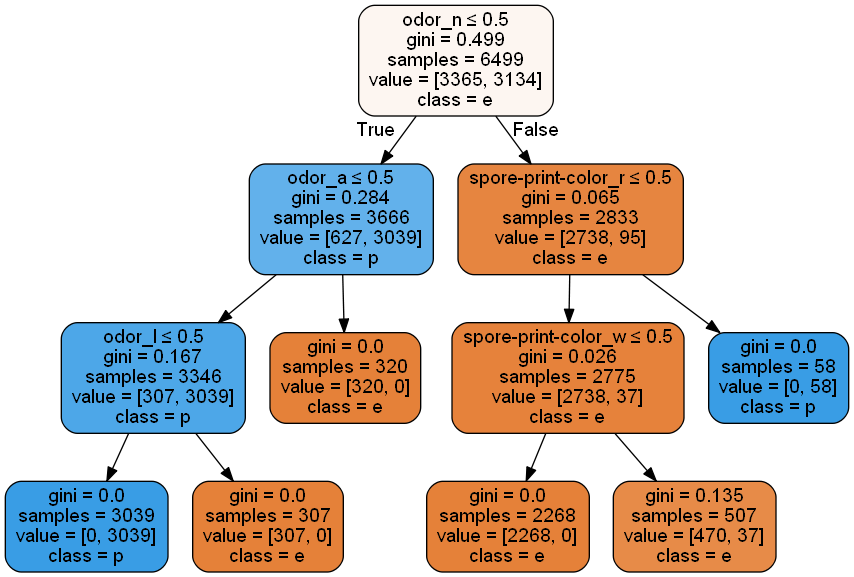

![決定木](./image/image.png)

odor : a（アーモンド） ・・・　食用<br>
odor : l（アニス）　・・・　毒<br>
odor : n（無臭）、spore-print-color : r（緑）　・・・　毒<br>
odor : n（無臭）、spore-print-color : w（白）以外　・・・　食用<br>
**odor : n（無臭）、spore-print-color : w（白）　・・・　食用/毒混在**<br>

混在している条件(**太字**)のデータのみを抽出し、分類に適切な説明変数について考える。

In [9]:
df_check = df_data[(df_data['odor'] == 'n') & (df_data['spore-print-color'] == 'w')]

for col in df_check.columns:
    if col=='class':
        continue
    print(col)
    df_c = pd.crosstab(index=df_check['class'],columns=df_check[col], margins=True)
    display(df_c)

cap-shape


cap-shape,b,c,f,k,x,All
class,,,,,,
e,100,0,100,180,196,576
p,12,4,12,12,8,48
All,112,4,112,192,204,624


cap-surface


cap-surface,f,g,s,y,All
class,,,,,
e,168,0,264,144,576
p,16,4,0,28,48
All,184,4,264,172,624


cap-color


cap-color,b,c,e,g,n,p,w,y,All
class,,,,,,,,,
e,48,32,48,152,96,56,144,0,576
p,0,0,0,0,16,0,8,24,48
All,48,32,48,152,112,56,152,24,624


bruises


bruises,f,t,All
class,,,
e,352,224,576
p,40,8,48
All,392,232,624


odor


odor,n,All
class,,
e,576,576
p,48,48
All,624,624


gill-attachment


gill-attachment,f,All
class,,
e,576,576
p,48,48
All,624,624


gill-spacing


gill-spacing,c,w,All
class,,,
e,240,336,576
p,32,16,48
All,272,352,624


gill-size


gill-size,b,n,All
class,,,
e,528,48,576
p,0,48,48
All,528,96,624


gill-color


gill-color,e,g,p,w,y,All
class,,,,,,
e,96,96,96,288,0,576
p,0,0,0,44,4,48
All,96,96,96,332,4,624


stalk-shape


stalk-shape,e,All
class,,
e,576,576
p,48,48
All,624,624


stalk-root


stalk-root,b,c,n,All
class,,,,
e,96,0,480,576
p,8,8,32,48
All,104,8,512,624


stalk-surface-above-ring


stalk-surface-above-ring,f,k,s,y,All
class,,,,,
e,24,144,392,16,576
p,0,32,8,8,48
All,24,176,400,24,624


stalk-surface-below-ring


stalk-surface-below-ring,f,k,s,y,All
class,,,,,
e,24,144,392,16,576
p,0,0,8,40,48
All,24,144,400,56,624


stalk-color-above-ring


stalk-color-above-ring,e,n,w,y,All
class,,,,,
e,96,16,464,0,576
p,0,0,40,8,48
All,96,16,504,8,624


stalk-color-below-ring


stalk-color-below-ring,e,n,w,y,All
class,,,,,
e,96,64,416,0,576
p,0,16,8,24,48
All,96,80,424,24,624


veil-color


veil-color,w,y,All
class,,,
e,576,0,576
p,40,8,48
All,616,8,624


ring-number


ring-number,o,t,All
class,,,
e,48,528,576
p,48,0,48
All,96,528,624


ring-type


ring-type,e,p,All
class,,,
e,240,336,576
p,40,8,48
All,280,344,624


spore-print-color


spore-print-color,w,All
class,,
e,576,576
p,48,48
All,624,624


population


population,c,n,s,v,y,All
class,,,,,,
e,192,144,144,64,32,576
p,16,0,0,32,0,48
All,208,144,144,96,32,624


habitat


habitat,d,g,l,p,w,All
class,,,,,,
e,8,288,48,40,192,576
p,32,0,16,0,0,48
All,40,288,64,40,192,624


#### gill-size（ひだの大きさ）に着目
| gill-size | b   | n   | All |
| --------- | --- | --- | --- |
|e|528|48|576|
|p|0|48|48|
|All|528|96|624|


gill-sizeがb（広い）であれば食用（528/0）、n（狭い）であれば48/48まで絞り込める。<br>
gill-size：n（狭い）のデータの確認を行う。

In [10]:
df_check2 = df_check[(df_check['gill-size'] == 'n')]

for col in df_check2.columns:
    if ((col=='class') | (col=='odor') | (col=='spore-print-color') | (col=='gill-size')):
        continue
    print(col)
    df_c = pd.crosstab(index=df_check2['class'],columns=df_check2[col], margins=True)
    display(df_c)

cap-shape


cap-shape,b,c,f,k,x,All
class,,,,,,
e,0,0,16,16,16,48
p,12,4,12,12,8,48
All,12,4,28,28,24,96


cap-surface


cap-surface,f,g,y,All
class,,,,
e,24,0,24,48
p,16,4,28,48
All,40,4,52,96


cap-color


cap-color,c,n,w,y,All
class,,,,,
e,24,24,0,0,48
p,0,16,8,24,48
All,24,40,8,24,96


bruises


bruises,f,t,All
class,,,
e,48,0,48
p,40,8,48
All,88,8,96


gill-attachment


gill-attachment,f,All
class,,
e,48,48
p,48,48
All,96,96


gill-spacing


gill-spacing,c,w,All
class,,,
e,0,48,48
p,32,16,48
All,32,64,96


gill-color


gill-color,w,y,All
class,,,
e,48,0,48
p,44,4,48
All,92,4,96


stalk-shape


stalk-shape,e,All
class,,
e,48,48
p,48,48
All,96,96


stalk-root


stalk-root,b,c,n,All
class,,,,
e,48,0,0,48
p,8,8,32,48
All,56,8,32,96


stalk-surface-above-ring


stalk-surface-above-ring,f,k,s,y,All
class,,,,,
e,24,0,24,0,48
p,0,32,8,8,48
All,24,32,32,8,96


stalk-surface-below-ring


stalk-surface-below-ring,f,s,y,All
class,,,,
e,24,24,0,48
p,0,8,40,48
All,24,32,40,96


stalk-color-above-ring


stalk-color-above-ring,w,y,All
class,,,
e,48,0,48
p,40,8,48
All,88,8,96


stalk-color-below-ring


stalk-color-below-ring,n,w,y,All
class,,,,
e,48,0,0,48
p,16,8,24,48
All,64,8,24,96


veil-color


veil-color,w,y,All
class,,,
e,48,0,48
p,40,8,48
All,88,8,96


ring-number


ring-number,o,All
class,,
e,48,48
p,48,48
All,96,96


ring-type


ring-type,e,p,All
class,,,
e,48,0,48
p,40,8,48
All,88,8,96


population


population,c,v,All
class,,,
e,0,48,48
p,16,32,48
All,16,80,96


habitat


habitat,d,l,All
class,,,
e,0,48,48
p,32,16,48
All,32,64,96


* gill-size(ひだの大きさ)
* gill-spacing(ひだの間隔)
* cap_color(傘の色)

上記説明変数を追加することで精度があがると考えられる。<br>

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

df_tree2 = df_data.drop(['cap-shape', 'cap-surface', 'bruises','gill-attachment', 
                        'gill-color','stalk-shape', 'stalk-root', 'stalk-surface-above-ring','stalk-surface-below-ring', 
                       'stalk-color-above-ring','stalk-color-below-ring', 'veil-color', 'ring-number','ring-type', 'population', 
                        'habitat'], axis=1)
print(df_tree2.columns)
df_dummy2 =  pd.get_dummies(df_tree2[df_tree2.columns]) 

#毒キノコであることを目的変数
y2 = df_dummy2.class_p
#それ以外を説明変数
X2 = df_dummy2.drop(['class_p','class_e'], axis=1)

#学習データとテストデータを分割する
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state=42)

clf_dt = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_leaf=3, random_state=1234)
clf_dt = clf_dt.fit(X_train2, y_train2)

#学習データによる評価
print("--------------------------")
print()
print("DecisionTree")
print("Train score=", clf_dt.score(X_train2, y_train2))

#テストデータによる評価
y_pred = clf_dt.predict(X_test2)

#評価結果の表示
print("Accuracy :", accuracy_score(y_test2, y_pred))
print(classification_report(y_test2, y_pred))
print()

print("--------------------------")
print()
print("RandomForest")
clf_rf = RandomForestClassifier(n_estimators=10, max_depth=5, criterion="gini",
                                                 min_samples_leaf=2, min_samples_split=2, random_state=1234)
clf_rf = clf_rf.fit(X_train2, y_train2)

print("Train score=", clf_rf.score(X_train2, y_train2))

#テストデータで評価
y_pred_rf = clf_rf.predict(X_test2)

#評価結果の表示
print("Accuracy :", accuracy_score(y_test2, y_pred_rf))
print(classification_report(y_test2, y_pred_rf))
print()

print("--------------------------")
print()
print("AdaBoost")
clf_ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3,
                                                min_samples_leaf=2,
                                                min_samples_split=2, 
                                                random_state=1234,
                                                criterion="gini"),
                                           n_estimators=6, random_state=1234)
clf_ab.fit(X_train2, y_train2)
print("score=", clf_ab.score(X_train2, y_train2))

#テストデータで評価
y_pred_ab = clf_ab.predict(X_test2)

#評価結果の表示
print("Accuracy :", accuracy_score(y_test2, y_pred_ab))
print(classification_report(y_test2, y_pred_ab))

Index(['class', 'cap-color', 'odor', 'gill-spacing', 'gill-size',
       'spore-print-color'],
      dtype='object')
--------------------------

DecisionTree
Train score= 1.0
Accuracy : 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       843
          1       1.00      1.00      1.00       782

avg / total       1.00      1.00      1.00      1625


--------------------------

RandomForest
Train score= 0.9964609939990767
Accuracy : 0.9944615384615385
             precision    recall  f1-score   support

          0       1.00      0.99      0.99       843
          1       0.99      1.00      0.99       782

avg / total       0.99      0.99      0.99      1625


--------------------------

AdaBoost
score= 1.0
Accuracy : 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       843
          1       1.00      1.00      1.00       782

avg / total       1.00      1.00      1.00      162

In [13]:
#SVM
parameters = {'kernel':['linear','rbf'], 'C':[1,5]}
mdl_svm2 = SVC()
clf_svm2 = GridSearchCV(mdl_svm2, parameters, cv=3)
clf_svm2.fit(X_train2, y_train2)

print(clf_svm2.best_params_)

{'C': 5, 'kernel': 'linear'}


In [14]:
#学習データによる評価
print("Train score=", clf_svm2.best_estimator_.score(X_train2, y_train2))

#テストデータで評価
y_pred_svm2 = clf_svm2.best_estimator_.predict(X_test2)

#評価結果の表示
print("Accuracy :", accuracy_score(y_test2, y_pred_svm2))
print(classification_report(y_test2, y_pred_svm2))

Train score= 1.0
Accuracy : 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       843
          1       1.00      1.00      1.00       782

avg / total       1.00      1.00      1.00      1625



Train on 6499 samples, validate on 1625 samples
Epoch 1/30
6499/6499 [==============================] - 1s 82us/step - loss: 0.0370 - acc: 0.9883 - val_loss: 9.9476e-04 - val_acc: 1.0000
Epoch 2/30
6499/6499 [==============================] - 0s 42us/step - loss: 3.0597e-04 - acc: 1.0000 - val_loss: 1.7471e-04 - val_acc: 1.0000
Epoch 3/30
6499/6499 [==============================] - 0s 45us/step - loss: 9.7580e-05 - acc: 1.0000 - val_loss: 7.7604e-05 - val_acc: 1.0000
Epoch 4/30
6499/6499 [==============================] - 0s 41us/step - loss: 4.8016e-05 - acc: 1.0000 - val_loss: 4.5707e-05 - val_acc: 1.0000
Epoch 5/30
6499/6499 [==============================] - 0s 44us/step - loss: 2.8276e-05 - acc: 1.0000 - val_loss: 2.9427e-05 - val_acc: 1.0000
Epoch 6/30
6499/6499 [==============================] - 0s 42us/step - loss: 1.8043e-05 - acc: 1.0000 - val_loss: 1.9301e-05 - val_acc: 1.0000
Epoch 7/30
6499/6499 [==============================] - 0s 44us/step - loss: 1.2186e-05 - acc: 1.0

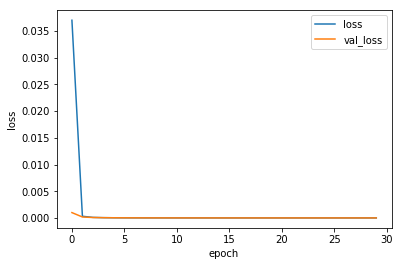

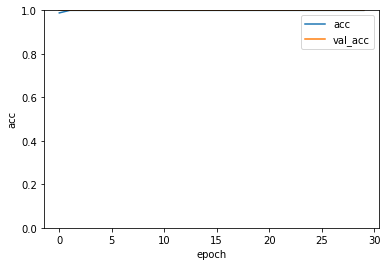

In [15]:
#ニューラルネットワーク
#目的変数
y3 = df_dummy2[['class_p','class_e']]
#それ以外を説明変数
X3 = df_dummy2.drop(['class_p','class_e'], axis=1)

#学習データとテストデータを分割する
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3, test_size = 0.2, random_state=42)

mdl_nn2 = Sequential()
mdl_nn2.add(Dense(16, activation='relu', input_dim=32))
mdl_nn2.add(Dense(8, activation='relu', input_dim=16))
mdl_nn2.add(Dense(2, activation='softmax'))
adam = Adam(lr=0.01)
#sgd = SGD(lr=0.01, momentum=0.9, nesterov=False)
mdl_nn2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

#学習データによる評価
fit2 = mdl_nn2.fit(X_train3, y_train3, epochs=30, batch_size=20, validation_data=(X_test3, y_test3))

# 各epochにおける損失と精度をdfに入れる
df = pd.DataFrame(fit2.history)

# グラフ化
df[["loss", "val_loss"]].plot()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

df[["acc", "val_acc"]].plot()
plt.ylabel("acc")
plt.xlabel("epoch")
plt.ylim([0,1.0])
plt.show()

### 各結果の比較
| 　          | Accuracy | precision | recall | f1-score |
| ----------- | -------- | --------- | ------ | -------- | 
|決定木|1.0|1.0|1.0|1.0|
|ランダムフォレスト|0.9944|0.99|0.99|0.99|
|アダブースト|1.0|1.0|1.0|1.0|
|SVM|1.0|1.0|1.0|1.0|
|ニューラルネット|1.0| - | - | - |


#### 考察
決定木で判定の行えていなかったデータに対して、それを判定できると考えられる3つの説明変数を追加することで各モデルの精度が向上した。<br>
決定木、アダブースト、SVM、ニューラルネットで100%。また、ランダムフォレストも99.4%まで精度が向上した。<br>

自分が予測ツールを使用する立場になって考えた場合<br>
見つけたキノコに対して、学習モデルにかけるためにodor、spore-print-colorを調べる必要があるが、下記理由により調べることができるか疑問である。<br>
* odor ・・・　きつい臭いがする可能性のあるキノコを匂う。
* spore-print-color　・・・　胞子の色を調べる方法が分からない。

キノコが生えている状態を観察し判別できる下記のような説明変数を選択する必要がある。
* cap-shape, cap-surface, cap-colorのようなキノコの傘に関わる変数
* gill-attachment, gill-size, gill-colorのようなひだに関わる変数
* population, habitatのような生息状態・環境に関わる変数


